In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import toolz as tz
import os 
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py
from matplotlib.colors import ListedColormap


Mounted at /content/drive


#Reading Data

In [2]:
print(os.getcwd())
print(os.getcwd())
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets/Solar")
os.chdir("/content/drive/MyDrive/solar_data/")
files_dir = "/content/drive/MyDrive/solar_data/"
filename1 = files_dir + "Plant_1_Generation_Data.csv"
print(filename1)
print(os.getcwd())
filename2 = files_dir + "Plant_2_Generation_Data.csv"
filename3 = files_dir + "Plant_1_Weather_Sensor_Data.csv"
filename4 = files_dir + "Plant_2_Weather_Sensor_Data.csv"

/content
/content
/content/drive/MyDrive/solar_data/Plant_1_Generation_Data.csv
/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data


In [3]:
df_plant1 = pd.read_csv(filename1, parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant2 = pd.read_csv(filename2,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df_weather1 = pd.read_csv(filename3,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather2 = pd.read_csv(filename4,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather12 = pd.concat([df_weather1,df_weather2],axis=0)
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 352.2+ KB


In [5]:
timeinfoplant1 = df_plant1['DATE_TIME'].dt.time
dateinfoplant1= df_plant1['DATE_TIME'].dt.date
#print(df_plant1['DATE_TIME'].dt.time)
#print(df_plant1['DATE_TIME'].dt.date)
#ds_plant1_grp_src=df_plant1.groupby("SOURCE_KEY")["SOURCE_KEY"].count()

timeinfoplant2 = df_plant2['DATE_TIME'].dt.time
dateinfoplant2= df_plant2['DATE_TIME'].dt.date

#df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values)
df_plant1['TIME'] = timeinfoplant1
#df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values)
df_plant2['TIME'] = timeinfoplant2
df_plant1
pd.to_datetime(df_plant1['DATE'])
pd.to_datetime(df_plant2['DATE'])
df_plant12= pd.concat([df_plant1,df_plant2],axis = 0)
pd.to_datetime(df_plant12['DATE_TIME'])
df_plant12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
 7   DATE         136476 non-null  datetime64[ns]
 8   TIME         136476 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 10.4+ MB


In [6]:
pd.to_datetime(df_weather12['DATE_TIME'])
timeinfoweather12 = df_weather12['DATE_TIME'].dt.time
dateinfoweather12= df_weather12['DATE_TIME'].dt.date
df_weather12['DATE'] = pd.to_datetime(dateinfoweather12.values)
df_weather12['TIME'] = timeinfoweather12
pd.to_datetime(df_weather12['DATE'])
pd.to_datetime(df_weather12['DATE_TIME'])
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
 6   DATE                 6441 non-null   datetime64[ns]
 7   TIME                 6441 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 452.9+ KB


In [7]:
result12 = pd.merge(df_plant12,df_weather12, how ="left", on=["DATE","TIME","PLANT_ID"])
result12.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

# Feature Scaling

Describe extreme values for each feature

AC power contains some extreme values, while DC power has a substantial portion of higher values, though we can't necessarily say these are extreme given their prevalence.

Zero values for total yield and daily yield might be considered extreme given that they are cumulative figures.

In terms of weateher features, irradiation and ambient temperature contain extreme values, while module temperature does not appear to.

List the features and the number of extreme values for each feature

extreme values in irradiation: 216 / 271352
extreme values in ac power: 236 / 271356
extreme values in dc power: 52348 / 271356
extreme values in ambient temp: 880 / 271352
extreme values in total yield: 270237 / 271356
Discussion

Extreme values make up a large portion of our DC power data, so we will preserve these in the data for scaling or normalization.

For AC power and irratiation, we might consider dropping the 236 outliers (about 1%) of total data points.

Zero readings for daily and total yield might introduce bias into the model.

## Check Exrtreme Values

In [8]:
feature_names = np.array(result12.columns)
feature_names

def box_plot_features(df, feature_array):
  for feature in feature_array: 
   px.box(df, y=feature, height=500, width=200, boxmode='group').show()
   

box_plot_features(result12, feature_names)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
def above_upper_fence(feature_name, upper_fence_value):
  return result12[result12[feature_name] > upper_fence_value ]

irradtion_extremes = above_upper_fence("IRRADIATION", 1.098766)
ac_power_extremes = above_upper_fence("AC_POWER", 1334.643)
dc_power_extremes = above_upper_fence("DC_POWER", 2911.857)
ambient_temperature = above_upper_fence("AMBIENT_TEMPERATURE", 37.63801)
total_yield = above_upper_fence("TOTAL_YIELD", 648.2101)

irradiation_extremes_count = irradtion_extremes["IRRADIATION"].count()
ac_power_extremes_count = ac_power_extremes["AC_POWER"].count()
dc_power_extremes_count = dc_power_extremes["DC_POWER"].count()
ambient_temperature_count = ambient_temperature["AMBIENT_TEMPERATURE"].count()
total_yield_count = total_yield["TOTAL_YIELD"].count()

print("extreme values in irradiation:", irradiation_extremes_count, "/", result12["IRRADIATION"].count())
print("extreme values in ac power:", ac_power_extremes_count, "/", result12["AC_POWER"].count())
print("extreme values in dc power:", dc_power_extremes_count, "/", result12["DC_POWER"].count())
print("extreme values in ambient temp:", ambient_temperature_count, "/", result12["AMBIENT_TEMPERATURE"].count())
print("extreme values in total yield:", total_yield_count, "/", result12["TOTAL_YIELD"].count())

extreme values in irradiation: 110 / 136472
extreme values in ac power: 118 / 136476
extreme values in dc power: 26198 / 136476
extreme values in ambient temp: 396 / 136472
extreme values in total yield: 135913 / 136476


## Normalize

In [10]:
import sklearn.preprocessing

# Normalize with a min-max scaler
result12_normalized =result12.copy()
scaler = sklearn.preprocessing.MinMaxScaler()
features = ["DC_POWER","AC_POWER","DAILY_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
for feature in features:
  result12_normalized[feature] = scaler.fit_transform(result12_normalized[[feature]].values)
display(result12_normalized)

,DATE_TIME_x,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,DATE_TIME_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000000,6259559.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,0.254793,0.097269,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000000,6183645.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,0.254793,0.097269,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000000,6987759.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,0.254793,0.097269,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000000,7602960.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,0.254793,0.097269,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000000,7158964.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,0.254793,0.097269,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,0.421047,520758.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,0.149302,0.090637,0.0
136472,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,0.398157,121131356.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,0.149302,0.090637,0.0
136473,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,0.437760,2427691.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,0.149302,0.090637,0.0
136474,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,0.427226,106896394.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,0.149302,0.090637,0.0


## Standardize

In [11]:
import sklearn.preprocessing

# standardize with a standard scaler
result12_standardized = result12.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["DC_POWER","AC_POWER","DAILY_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
for feature in features:
  result12_standardized[feature] = scaler.fit_transform(result12_standardized[[feature]].values)
display(result12_standardized)

,DATE_TIME_x,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,DATE_TIME_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,-0.530246,-0.722823,-1.085709,6259559.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,-0.405085,-0.767835,-0.755001
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,-0.530246,-0.722823,-1.085709,6183645.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,-0.405085,-0.767835,-0.755001
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,-0.530246,-0.722823,-1.085709,6987759.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,-0.405085,-0.767835,-0.755001
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,-0.530246,-0.722823,-1.085709,7602960.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,-0.405085,-0.767835,-0.755001
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,-0.530246,-0.722823,-1.085709,7158964.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,-0.405085,-0.767835,-0.755001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,-0.530246,-0.722823,0.283850,520758.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,-0.913497,-0.795081,-0.755001
136472,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,-0.530246,-0.722823,0.209393,121131356.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,-0.913497,-0.795081,-0.755001
136473,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,-0.530246,-0.722823,0.338211,2427691.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,-0.913497,-0.795081,-0.755001
136474,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,-0.530246,-0.722823,0.303947,106896394.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,-0.913497,-0.795081,-0.755001


## Visual & Numeric Comparison 1:

In [12]:
import sklearn.preprocessing
for feature in features:
  x1 = result12_normalized[[feature]]
  x2 = result12_standardized[[feature]]
  mean1 = round(np.mean(x1)[0],3)
  std1 = round(np.std(x1)[0],3)
  mean2 = round(np.mean(x2)[0],3)
  std2 = round(np.std(x2)[0],3)
  print(feature.ljust(20)+" Mean (Norm, Stand) : ("+str(mean1).ljust(5)+" , "+str(mean2).ljust(5)+")"\
        +" Standard Deviation (Norm, Stand) : ("+str(std1).ljust(5)+" , "+str(std2).ljust(5)+")")

DC_POWER             Mean (Norm, Stand) : (0.118 , -0.0 ) Standard Deviation (Norm, Stand) : (0.223 , 1.0  )
AC_POWER             Mean (Norm, Stand) : (0.195 , 0.0  ) Standard Deviation (Norm, Stand) : (0.269 , 1.0  )
DAILY_YIELD          Mean (Norm, Stand) : (0.334 , -0.0 ) Standard Deviation (Norm, Stand) : (0.307 , 1.0  )
AMBIENT_TEMPERATURE  Mean (Norm, Stand) : (0.339 , -0.0 ) Standard Deviation (Norm, Stand) : (0.207 , 1.0  )
MODULE_TEMPERATURE   Mean (Norm, Stand) : (0.284 , -0.0 ) Standard Deviation (Norm, Stand) : (0.243 , 1.0  )
IRRADIATION          Mean (Norm, Stand) : (0.189 , 0.0  ) Standard Deviation (Norm, Stand) : (0.25  , 1.0  )


## Visual & Numeric Comparison 2:

In [13]:
import plotly.offline as pyo
feature_names =  ["DC_POWER","AC_POWER","DAILY_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
feature_names
fig = make_subplots(rows=1, cols=3)
#def box_plot_features(df,df_norm,df_std,feature_array):
fig.append_trace(go.Box(y=result12['DC_POWER'], name = 'DC_POWER',boxmean= True ),row = 1,col = 1)
fig.append_trace(go.Box(y=result12_normalized['DC_POWER'], name = 'DC_POWER-Norm',boxmean=True) ,row = 1,col = 2)
fig.append_trace(go.Box(y=result12_standardized['DC_POWER'], name = 'DC_POWER-Stand',boxmean = True) ,row = 1,col = 3)
#fig.update_layout(boxmode='group',height=600, width=800)
fig.show()


fig = make_subplots(rows=1, cols=3)
#def box_plot_features(df,df_norm,df_std,feature_array):
fig.append_trace(go.Box(y=result12['IRRADIATION'], name = 'IRRADIATION',boxmean= True),row = 1,col = 1)
fig.append_trace(go.Box(y=result12_normalized['IRRADIATION'], name = 'IRD-Norm',boxmean= True) ,row = 1,col = 2)
fig.append_trace(go.Box(y=result12_standardized['IRRADIATION'], name = 'IRD-Stand',boxmean= True) ,row = 1,col = 3)
#fig.update_layout(boxmode='group',height=600, width=800)
fig.show()

#box_plot_features(result12,result12_normalized,result12_standardized,feature_names)

Output hidden; open in https://colab.research.google.com to view.

# kNN

## Construction

In [14]:
result12_clean = result12.copy()

### Preparing Dataset for KNN and classification

In [15]:
#temp = result12_clean.groupby(['DATE','SOURCE_KEY_x'])['DC_POWER','AC_POWER'].sum().reset_index() 
#temp = result12_clean.groupby(['TIME','SOURCE_KEY_x']).agg({'DC_POWER':'mean', 'AC_POWER':'sum','IRRADIATION':'mean'}).reset_index() 
temp = result12_clean.groupby(['PLANT_ID','SOURCE_KEY_x','DATE','TIME']).agg({'DC_POWER':'first', 'AC_POWER':'first','IRRADIATION':'first'}).reset_index() 

temp.info()

#px.box(temp, y='DC_POWER', height=500, width=200, boxmode='group').show()
#px.box(temp, y='IRRADIATION', height=500, width=200, boxmode='group').show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PLANT_ID      136476 non-null  int64         
 1   SOURCE_KEY_x  136476 non-null  object        
 2   DATE          136476 non-null  datetime64[ns]
 3   TIME          136476 non-null  object        
 4   DC_POWER      136476 non-null  float64       
 5   AC_POWER      136476 non-null  float64       
 6   IRRADIATION   136472 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 7.3+ MB


In [16]:
one = temp[temp['PLANT_ID'] == 4136001]
two = temp[temp['PLANT_ID'] == 4135001]

In [ ]:
one.describe()

,PLANT_ID,DC_POWER,AC_POWER,IRRADIATION
count,67698.0,67698.000000,67698.000000,67698.000000
mean,4136001.0,246.701961,241.277825,0.229204
std,0.0,370.569597,362.112118,0.309365
min,4136001.0,0.000000,0.000000,0.000000
25%,4136001.0,0.000000,0.000000,0.000000
50%,4136001.0,0.000000,0.000000,0.018554
75%,4136001.0,446.591667,438.215000,0.431027
max,4136001.0,1420.933333,1385.420000,1.098766


In [17]:
two.describe()

,PLANT_ID,DC_POWER,AC_POWER,IRRADIATION
count,68778.0,68778.000000,68778.000000,68774.000000
mean,4135001.0,3147.426211,307.802752,0.232305
std,0.0,4036.457169,394.396439,0.301948
min,4135001.0,0.000000,0.000000,0.000000
25%,4135001.0,0.000000,0.000000,0.000000
50%,4135001.0,429.000000,41.493750,0.031620
75%,4135001.0,6366.964286,623.618750,0.454880
max,4135001.0,14471.125000,1410.950000,1.221652


In [18]:

px.box(one, y='DC_POWER', height=500, width=200, boxmode='group').show()
px.box(one, y='IRRADIATION', height=500, width=200, boxmode='group').show()

In [19]:
one

,PLANT_ID,SOURCE_KEY_x,DATE,TIME,DC_POWER,AC_POWER,IRRADIATION
68778,4136001,4UPUqMRk7TRMgml,2020-05-15,00:00:00,0.0,0.0,0.0
68779,4136001,4UPUqMRk7TRMgml,2020-05-15,00:15:00,0.0,0.0,0.0
68780,4136001,4UPUqMRk7TRMgml,2020-05-15,00:30:00,0.0,0.0,0.0
68781,4136001,4UPUqMRk7TRMgml,2020-05-15,00:45:00,0.0,0.0,0.0
68782,4136001,4UPUqMRk7TRMgml,2020-05-15,01:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
136471,4136001,xoJJ8DcxJEcupym,2020-06-17,22:45:00,0.0,0.0,0.0
136472,4136001,xoJJ8DcxJEcupym,2020-06-17,23:00:00,0.0,0.0,0.0
136473,4136001,xoJJ8DcxJEcupym,2020-06-17,23:15:00,0.0,0.0,0.0
136474,4136001,xoJJ8DcxJEcupym,2020-06-17,23:30:00,0.0,0.0,0.0


In [20]:
result_classification = temp
result_classification['Performance'] =''
result_classification["Performance"].astype("category")
result_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PLANT_ID      136476 non-null  int64         
 1   SOURCE_KEY_x  136476 non-null  object        
 2   DATE          136476 non-null  datetime64[ns]
 3   TIME          136476 non-null  object        
 4   DC_POWER      136476 non-null  float64       
 5   AC_POWER      136476 non-null  float64       
 6   IRRADIATION   136472 non-null  float64       
 7   Performance   136476 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 8.3+ MB


In [21]:
for i, row in result_classification.iterrows():
  if(row['PLANT_ID'] == 4136001):
    if(row['DC_POWER'] >=	400 ):
       result_classification.loc[i,'Performance']='Above Average'
    if(row['DC_POWER'] < 	400 ):
       result_classification.loc[i,'Performance']='Below Average'
    if(row['DC_POWER'] < 400 and row['IRRADIATION'] >=0.4 ):
       result_classification.loc[i,'Performance']='Maintenance Required'    
    if(row['DC_POWER'] == 0 and row['IRRADIATION'] <0.07 ):
       result_classification.loc[i,'Performance']='Normal'  
  if(row['PLANT_ID'] == 4135001):
    if(row['DC_POWER'] >=	3147 ):
       result_classification.loc[i,'Performance']='Above Average'
    if(row['DC_POWER'] < 	3147 ):
       result_classification.loc[i,'Performance']='Below Average'
    if(row['DC_POWER'] < 1000 and row['IRRADIATION'] >=0.4 ):
       result_classification.loc[i,'Performance']='Maintenance Required'    
    if(row['DC_POWER'] == 0 and row['IRRADIATION'] <0.07 ):
       result_classification.loc[i,'Performance']='Normal'     

In [22]:
result_classification['Performance'].unique()

array(['Normal', 'Below Average', 'Above Average', 'Maintenance Required'],
      dtype=object)

In [23]:
result_classification
result_classification.groupby('Performance').count()

,PLANT_ID,SOURCE_KEY_x,DATE,TIME,DC_POWER,AC_POWER,IRRADIATION
Performance,,,,,,,
Above Average,43844,43844,43844,43844,43844,43844,43840
Below Average,24532,24532,24532,24532,24532,24532,24532
Maintenance Required,4332,4332,4332,4332,4332,4332,4332
Normal,63768,63768,63768,63768,63768,63768,63768


In [25]:
fig = px.histogram(result_classification, x='Performance', marginal="box")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
fig = px.scatter(result_classification, x="DC_POWER", y="Performance", title='classifiers', color = 'Performance',hover_data=['PLANT_ID'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
fig = px.scatter(result_classification, x="IRRADIATION", y="DC_POWER", title='classifiers', color = 'Performance',hover_data=['PLANT_ID'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
result_classification['Performance'].isnull().sum()

0

In [27]:
result_classification_bkp = result_classification.copy();

In [28]:
result_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PLANT_ID      136476 non-null  int64         
 1   SOURCE_KEY_x  136476 non-null  object        
 2   DATE          136476 non-null  datetime64[ns]
 3   TIME          136476 non-null  object        
 4   DC_POWER      136476 non-null  float64       
 5   AC_POWER      136476 non-null  float64       
 6   IRRADIATION   136472 non-null  float64       
 7   Performance   136476 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 8.3+ MB


In [29]:
result_classification['SOURCE_KEY_x'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'YxYtjZvoooNbGkE', 'ZnxXDlPa8U1GXgE',
       'ZoEaEvLYb1n2sOq', 'adLQvlD726eNBSB', 'bvBOhCH3iADSZry',
       'iCRJl6heRkivqQ3', 'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj',
       'rGa61gmuvPhdLxV', 'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc',
       'wCURE6d3bPkepu2', 'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY',
       'zVJPv84UY57bAof', '4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL',
       '9kRcWv60rDACzjR', 'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q',
       'LYwnQax7tkwH5Cb', 'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv',
       'NgDl19wMapZy17u', 'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6',
       'Quc1TzYxW2pYoWX', 'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt',
       'mqwcsP2rE7J0TFp', 'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz',
       'q49J1IKaHRwDQnt', 'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb',
       'xMbIugepa2P7lBB', 'xoJJ8DcxJEcupym'], dtype=object)

In [30]:
result_classification['SourceKeyCode'] = result_classification['SOURCE_KEY_x'].map({'1BY6WEcLGh8j5v7': '01', '7JYdWkrLSPkdwr4': '02', 'WRmjgnKYAwPKWDb': '03', \
                                                                      'adLQvlD726eNBSB': '04', 'ih0vzX44oOqAx2f': '05', 'sjndEbLyjtCKgGv': '06', \
                                                                      'z9Y9gH1T5YWrNuG': '07', 'YxYtjZvoooNbGkE': '08', '9kRcWv60rDACzjR': '09', \
                                                                      'LYwnQax7tkwH5Cb': '10', 'NgDl19wMapZy17u': '11', 'Quc1TzYxW2pYoWX': '12', \
                                                                      'mqwcsP2rE7J0TFp': '13', 'q49J1IKaHRwDQnt': '14', 'xMbIugepa2P7lBB': '15', \
                                                                      '1IF53ai7Xc0U56Y': '16', 'McdE0feGgRqW7Ca': '17', 'ZnxXDlPa8U1GXgE': '18', \
                                                                      'bvBOhCH3iADSZry': '19', 'pkci93gMrogZuBj': '20', 'uHbuxQJl8lW7ozc': '21', \
                                                                      'zBIq5rxdHJRwDNY': '22', '4UPUqMRk7TRMgml': '23', 'Et9kgGMDl729KT4': '24', \
                                                                      'LlT2YUhhzqhg5Sw': '25', 'PeE6FRyGXUgsRhN': '26', 'V94E5Ben1TlhnDV': '27', \
                                                                      'oZ35aAeoifZaQzV': '28', 'rrq4fwE8jgrTyWY': '29', 'xoJJ8DcxJEcupym': '30', \
                                                                      '3PZuoBAID5Wc2HD': '31', 'wCURE6d3bPkepu2': '32', 'Qf4GUc1pJu5T6c6': '33', \
                                                                      'VHMLBKoKgIrUVDU': '34', 'zVJPv84UY57bAof': '35', 'WcxssY2VbP4hApt': '36', \
                                                                      'ZoEaEvLYb1n2sOq': '37', '81aHJ1q11NBPMrL': '38', 'oZZkBaNadn6DNKz': '39', \
                                                                      'iCRJl6heRkivqQ3': '40', 'IQ2d7wF4YD8zU1Q': '41', 'vOuJvMaM2sgwLmb': '42', \
                                                                      'rGa61gmuvPhdLxV': '43', 'Mx2yZCDsyf6DPfv': '44'})
                                              

In [31]:
result_classification

,PLANT_ID,SOURCE_KEY_x,DATE,TIME,DC_POWER,AC_POWER,IRRADIATION,Performance,SourceKeyCode
0,4135001,1BY6WEcLGh8j5v7,2020-05-15,00:00:00,0.0,0.0,0.0,Normal,01
1,4135001,1BY6WEcLGh8j5v7,2020-05-15,00:15:00,0.0,0.0,0.0,Normal,01
2,4135001,1BY6WEcLGh8j5v7,2020-05-15,00:30:00,0.0,0.0,0.0,Normal,01
3,4135001,1BY6WEcLGh8j5v7,2020-05-15,00:45:00,0.0,0.0,0.0,Normal,01
4,4135001,1BY6WEcLGh8j5v7,2020-05-15,01:00:00,0.0,0.0,0.0,Normal,01
...,...,...,...,...,...,...,...,...,...
136471,4136001,xoJJ8DcxJEcupym,2020-06-17,22:45:00,0.0,0.0,0.0,Normal,30
136472,4136001,xoJJ8DcxJEcupym,2020-06-17,23:00:00,0.0,0.0,0.0,Normal,30
136473,4136001,xoJJ8DcxJEcupym,2020-06-17,23:15:00,0.0,0.0,0.0,Normal,30
136474,4136001,xoJJ8DcxJEcupym,2020-06-17,23:30:00,0.0,0.0,0.0,Normal,30


In [32]:
#result12_clean = result12_clean.drop('SOURCE_KEY_y',axis = 1)
result_classification = result_classification.drop('SOURCE_KEY_x',axis = 1)

In [33]:
result_classification.info()
Perf_type = pd.CategoricalDtype(categories=["Above Average", "Below Average", "Maintenance Required", "Normal"])

result_classification["Performance"] = result_classification["Performance"].astype(Perf_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   PLANT_ID       136476 non-null  int64         
 1   DATE           136476 non-null  datetime64[ns]
 2   TIME           136476 non-null  object        
 3   DC_POWER       136476 non-null  float64       
 4   AC_POWER       136476 non-null  float64       
 5   IRRADIATION    136472 non-null  float64       
 6   Performance    136476 non-null  object        
 7   SourceKeyCode  136476 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 8.3+ MB


In [34]:
#result12_clean["SourceKeyCode"] = result12_clean["SourceKeyCode"].astype("uint8")
result_classification["Performance"].astype("category")

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
           ...  
136471    Normal
136472    Normal
136473    Normal
136474    Normal
136475    Normal
Name: Performance, Length: 136476, dtype: category
Categories (4, object): ['Above Average', 'Below Average', 'Maintenance Required', 'Normal']

In [35]:
pd.set_option('display.max_rows', 100)


In [36]:
result_classification

,PLANT_ID,DATE,TIME,DC_POWER,AC_POWER,IRRADIATION,Performance,SourceKeyCode
0,4135001,2020-05-15,00:00:00,0.0,0.0,0.0,Normal,01
1,4135001,2020-05-15,00:15:00,0.0,0.0,0.0,Normal,01
2,4135001,2020-05-15,00:30:00,0.0,0.0,0.0,Normal,01
3,4135001,2020-05-15,00:45:00,0.0,0.0,0.0,Normal,01
4,4135001,2020-05-15,01:00:00,0.0,0.0,0.0,Normal,01
...,...,...,...,...,...,...,...,...
136471,4136001,2020-06-17,22:45:00,0.0,0.0,0.0,Normal,30
136472,4136001,2020-06-17,23:00:00,0.0,0.0,0.0,Normal,30
136473,4136001,2020-06-17,23:15:00,0.0,0.0,0.0,Normal,30
136474,4136001,2020-06-17,23:30:00,0.0,0.0,0.0,Normal,30


In [37]:
#result12_clean = result12_clean.drop('SourceKeyCode',axis = 1)
import datetime as dt
result_classification['DATE'] = pd.to_datetime(result_classification['DATE'])
result_classification['DATE_NUM']=result_classification['DATE'].map(dt.datetime.toordinal)

result_classification["Performance"].astype("category")
result_classification['TIME'] = result_classification['TIME'].astype(str)
result_classification['New_Time'] = result_classification['TIME'].str.replace('\:', '').astype(int)
result_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   PLANT_ID       136476 non-null  int64         
 1   DATE           136476 non-null  datetime64[ns]
 2   TIME           136476 non-null  object        
 3   DC_POWER       136476 non-null  float64       
 4   AC_POWER       136476 non-null  float64       
 5   IRRADIATION    136472 non-null  float64       
 6   Performance    136476 non-null  category      
 7   SourceKeyCode  136476 non-null  object        
 8   DATE_NUM       136476 non-null  int64         
 9   New_Time       136476 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 9.5+ MB


In [38]:
result_classification = result_classification.drop('TIME',axis = 1)
result_classification = result_classification.drop('AC_POWER',axis = 1)

In [39]:
import sklearn.preprocessing

# standardize with a standard scaler
result12_clean_standardized = result_classification.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["DATE_NUM","New_Time","DC_POWER","IRRADIATION","SourceKeyCode"]
for feature in features:
  result12_clean_standardized[feature] = scaler.fit_transform(result_classification[[feature]].values)
#display(df_standardized)

# Normalize with a min-max scaler
result12_clean_normalized =result_classification.copy()
scaler = sklearn.preprocessing.MinMaxScaler()
features = ["DATE_NUM","New_Time","DC_POWER","IRRADIATION","SourceKeyCode"]
for feature in features:
  result12_clean_normalized[feature] = scaler.fit_transform(result_classification[[feature]].values)
#display(df_normalized)

#print all the results!
for feature in features:
  x1 = result12_clean_normalized[[feature]]
  x2 = result12_clean_standardized[[feature]]
  mean1 = round(np.mean(x1)[0],3)
  std1 = round(np.std(x1)[0],3)
  mean2 = round(np.mean(x2)[0],3)
  std2 = round(np.std(x2)[0],3)
  print(feature.ljust(20)+" Mean (Norm, Stand) : ("+str(mean1).ljust(5)+" , "+str(mean2).ljust(5)+")"\
        +" Standard Deviation (Norm, Stand) : ("+str(std1).ljust(5)+" , "+str(std2).ljust(5)+")")

DATE_NUM             Mean (Norm, Stand) : (0.512 , 0.0  ) Standard Deviation (Norm, Stand) : (0.299 , 1.0  )
New_Time             Mean (Norm, Stand) : (0.502 , 0.0  ) Standard Deviation (Norm, Stand) : (0.294 , 1.0  )
DC_POWER             Mean (Norm, Stand) : (0.118 , -0.0 ) Standard Deviation (Norm, Stand) : (0.223 , 1.0  )
IRRADIATION          Mean (Norm, Stand) : (0.189 , 0.0  ) Standard Deviation (Norm, Stand) : (0.25  , 1.0  )
SourceKeyCode        Mean (Norm, Stand) : (0.503 , -0.0 ) Standard Deviation (Norm, Stand) : (0.295 , 1.0  )


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [41]:
result12_clean_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   PLANT_ID       136476 non-null  int64         
 1   DATE           136476 non-null  datetime64[ns]
 2   DC_POWER       136476 non-null  float64       
 3   IRRADIATION    136472 non-null  float64       
 4   Performance    136476 non-null  category      
 5   SourceKeyCode  136476 non-null  float64       
 6   DATE_NUM       136476 non-null  float64       
 7   New_Time       136476 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 7.4 MB


In [42]:
cols = list(result12_clean_normalized.columns.values)
cols
result12_clean_normalized = result12_clean_normalized[['DATE_NUM','New_Time', 'DC_POWER', 'IRRADIATION', 'SourceKeyCode','Performance']]
result12_clean_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   DATE_NUM       136476 non-null  float64 
 1   New_Time       136476 non-null  float64 
 2   DC_POWER       136476 non-null  float64 
 3   IRRADIATION    136472 non-null  float64 
 4   SourceKeyCode  136476 non-null  float64 
 5   Performance    136476 non-null  category
dtypes: category(1), float64(5)
memory usage: 5.3 MB


In [43]:
for i, row in result12_clean_normalized.iterrows():
    if(np.isnan(row['IRRADIATION'])== True):
       print(result12_clean_normalized.loc[i])
       result12_clean_normalized.loc[i,'IRRADIATION'] = result12_clean_normalized.loc[i-1,'IRRADIATION']

DATE_NUM              0.575758
New_Time              0.597015
DC_POWER              0.483929
IRRADIATION                NaN
SourceKeyCode         0.348837
Performance      Above Average
Name: 4895, dtype: object
DATE_NUM              0.575758
New_Time              0.597015
DC_POWER              0.497819
IRRADIATION                NaN
SourceKeyCode        0.0697674
Performance      Above Average
Name: 32997, dtype: object
DATE_NUM              0.575758
New_Time              0.597015
DC_POWER              0.521383
IRRADIATION                NaN
SourceKeyCode          0.72093
Performance      Above Average
Name: 58037, dtype: object
DATE_NUM              0.575758
New_Time              0.597015
DC_POWER              0.549093
IRRADIATION                NaN
SourceKeyCode         0.139535
Performance      Above Average
Name: 61163, dtype: object


In [44]:
result12_clean_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   PLANT_ID       136476 non-null  int64         
 1   DATE           136476 non-null  datetime64[ns]
 2   DC_POWER       136476 non-null  float64       
 3   IRRADIATION    136472 non-null  float64       
 4   Performance    136476 non-null  category      
 5   SourceKeyCode  136476 non-null  float64       
 6   DATE_NUM       136476 non-null  float64       
 7   New_Time       136476 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 7.4 MB


In [45]:
for i, row in result12_clean_standardized.iterrows():
    if(np.isnan(row['IRRADIATION'])== True):
       print(result12_clean_standardized.loc[i])
       result12_clean_standardized.loc[i,'IRRADIATION'] = result12_clean_standardized.loc[i-1,'IRRADIATION']

PLANT_ID                     4135001
DATE             2020-06-03 00:00:00
DC_POWER                     1.64313
IRRADIATION                      NaN
Performance            Above Average
SourceKeyCode              -0.521956
DATE_NUM                    0.213766
New_Time                    0.322905
Name: 4895, dtype: object
PLANT_ID                     4135001
DATE             2020-06-03 00:00:00
DC_POWER                     1.70552
IRRADIATION                      NaN
Performance            Above Average
SourceKeyCode               -1.46778
DATE_NUM                    0.213766
New_Time                    0.322905
Name: 32997, dtype: object
PLANT_ID                     4135001
DATE             2020-06-03 00:00:00
DC_POWER                     1.81134
IRRADIATION                      NaN
Performance            Above Average
SourceKeyCode               0.739148
DATE_NUM                    0.213766
New_Time                    0.322905
Name: 58037, dtype: object
PLANT_ID                     413

In [46]:

result12_clean_standardized = result12_clean_standardized[['DATE_NUM','New_Time', 'DC_POWER', 'IRRADIATION', 'SourceKeyCode','Performance']]
result12_clean_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   DATE_NUM       136476 non-null  float64 
 1   New_Time       136476 non-null  float64 
 2   DC_POWER       136476 non-null  float64 
 3   IRRADIATION    136476 non-null  float64 
 4   SourceKeyCode  136476 non-null  float64 
 5   Performance    136476 non-null  category
dtypes: category(1), float64(5)
memory usage: 5.3 MB


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df = result12_clean_normalized.copy()
#split the dataset into a training set and a testing set
df_train, df_test = train_test_split(df, test_size=0.4)

#Make all features except the last column into the inputs(X)
X_train = df_train.iloc[:, :-1]
X_train.info()
#isna()
X_test = df_test.iloc[:, :-1] 

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['Performance']
y_test = df_test['Performance']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81885 entries, 97570 to 7187
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_NUM       81885 non-null  float64
 1   New_Time       81885 non-null  float64
 2   DC_POWER       81885 non-null  float64
 3   IRRADIATION    81885 non-null  float64
 4   SourceKeyCode  81885 non-null  float64
dtypes: float64(5)
memory usage: 3.7 MB


In [48]:
#test = X_test[X_test.isna()==False]
#test.head()
#test= X_train.isna()
#display(test)
np.any(np.isnan(X_train))
X_train.isnull().sum()
#np.all(np.isfinite(X_test))


DATE_NUM         0
New_Time         0
DC_POWER         0
IRRADIATION      0
SourceKeyCode    0
dtype: int64

In [49]:
np.any(np.isnan(X_train))
X_train.isnull().sum()

DATE_NUM         0
New_Time         0
DC_POWER         0
IRRADIATION      0
SourceKeyCode    0
dtype: int64

### Varying n and weights

In [50]:
 print("kNN Neighbors: Normalized Dataset")
for n in [5,11,15]:
    print("kNN Neighbors: "+str(n))
    for w in ['uniform','distance']:
      print("kNN Weights: "+str(w))
      #make predictions
      knn = KNeighborsClassifier(n_neighbors=n,weights=w)
      knn.fit(X_train, y_train) 
      yhat_train = knn.predict(X_train)
      yhat_test = knn.predict(X_test)

      #get metrics
      train_acc = accuracy_score(y_train, yhat_train)
      test_acc = accuracy_score(y_test, yhat_test)
      train_prec = precision_score(y_train, yhat_train, average='weighted')
      test_prec = precision_score(y_test, yhat_test, average='weighted')
      print("Training Data: Accuracy Score ", train_acc)
      print("Test Data: Accuracy Score ",test_acc)
      print("Training Data: precision_score ", train_acc)
      print("Test Data: precision_score ",test_acc)
      print("Training Data: recall_score ",recall_score(y_train, yhat_train,average='weighted'))
      print("Test Data: recall_score ",recall_score(y_test, yhat_test,average='weighted'))
      print("Training Data: f1_score ",f1_score(y_train, yhat_train,average='weighted'))
      print("Test Data: f1_score ",f1_score(y_test, yhat_test,average='weighted'))  



kNN Neighbors: Normalized Dataset
kNN Neighbors: 5
kNN Weights: uniform
Training Data: Accuracy Score  0.9899706906026745
Test Data: Accuracy Score  0.980436694021102
Training Data: precision_score  0.9899706906026745
Test Data: precision_score  0.980436694021102
Training Data: recall_score  0.9899706906026745
Test Data: recall_score  0.980436694021102
Training Data: f1_score  0.9899463138528395
Test Data: f1_score  0.9803354163283134
kNN Weights: distance
Training Data: Accuracy Score  1.0
Test Data: Accuracy Score  0.9770296014067995
Training Data: precision_score  1.0
Test Data: precision_score  0.9770296014067995
Training Data: recall_score  1.0
Test Data: recall_score  0.9770296014067995
Training Data: f1_score  1.0
Test Data: f1_score  0.976961276402747
kNN Neighbors: 11
kNN Weights: uniform
Training Data: Accuracy Score  0.9845484520974538
Test Data: Accuracy Score  0.9773959554513482
Training Data: precision_score  0.9845484520974538
Test Data: precision_score  0.97739595545134

In [51]:
result12_clean_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   DATE_NUM       136476 non-null  float64 
 1   New_Time       136476 non-null  float64 
 2   DC_POWER       136476 non-null  float64 
 3   IRRADIATION    136476 non-null  float64 
 4   SourceKeyCode  136476 non-null  float64 
 5   Performance    136476 non-null  category
dtypes: category(1), float64(5)
memory usage: 5.3 MB


KNN - standardized

In [52]:
result12_clean_standardized = result12_clean_standardized[['DATE_NUM','New_Time', 'DC_POWER', 'IRRADIATION', 'SourceKeyCode','Performance']]
#result12_clean_normalized.info()
df =  result12_clean_standardized.copy()
#split the dataset into a training set and a testing set
df_train, df_test = train_test_split(df, test_size=0.2)

#Make all features except the last column into the inputs(X)
X_train = df_train.iloc[:, :-1]
X_train.info()
#isna()
X_test = df_test.iloc[:, :-1] 

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['Performance']
y_test = df_test['Performance']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109180 entries, 24492 to 101660
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DATE_NUM       109180 non-null  float64
 1   New_Time       109180 non-null  float64
 2   DC_POWER       109180 non-null  float64
 3   IRRADIATION    109180 non-null  float64
 4   SourceKeyCode  109180 non-null  float64
dtypes: float64(5)
memory usage: 5.0 MB


In [53]:
print("kNN Neighbors: Standardized Dataset")
for n in [5,11,15]:
    print("kNN Neighbors: "+str(n))
    for w in ['uniform','distance']:
      print("kNN Weights: "+str(w))
      #make predictions
      knn = KNeighborsClassifier(n_neighbors=n,weights=w)
      knn.fit(X_train, y_train) 
      yhat_train = knn.predict(X_train)
      yhat_test = knn.predict(X_test)

      #get metrics
      train_acc = accuracy_score(y_train, yhat_train)
      test_acc = accuracy_score(y_test, yhat_test)
      train_prec = precision_score(y_train, yhat_train, average='weighted')
      test_prec = precision_score(y_test, yhat_test, average='weighted')
      print("Training Data: Accuracy Score ", train_acc)
      print("Test Data: Accuracy Score ",test_acc)
      print("Training Data: precision_score ", train_acc)
      print("Test Data: precision_score ",test_acc)
      print("Training Data: recall_score ",recall_score(y_train, yhat_train,average='weighted'))
      print("Test Data: recall_score ",recall_score(y_test, yhat_test,average='weighted'))
      print("Training Data: f1_score ",f1_score(y_train, yhat_train,average='weighted'))
      print("Test Data: f1_score ",f1_score(y_test, yhat_test,average='weighted'))  

kNN Neighbors: Standardized Dataset
kNN Neighbors: 5
kNN Weights: uniform
Training Data: Accuracy Score  0.9904744458692069
Test Data: Accuracy Score  0.9829279015240329
Training Data: precision_score  0.9904744458692069
Test Data: precision_score  0.9829279015240329
Training Data: recall_score  0.9904744458692069
Test Data: recall_score  0.9829279015240329
Training Data: f1_score  0.9904521569485195
Test Data: f1_score  0.9828612285596376
kNN Weights: distance
Training Data: Accuracy Score  1.0
Test Data: Accuracy Score  0.9806198710433763
Training Data: precision_score  1.0
Test Data: precision_score  0.9806198710433763
Training Data: recall_score  1.0
Test Data: recall_score  0.9806198710433763
Training Data: f1_score  1.0
Test Data: f1_score  0.98057379839395
kNN Neighbors: 11
kNN Weights: uniform
Training Data: Accuracy Score  0.9856567136838249
Test Data: Accuracy Score  0.9805466002344666
Training Data: precision_score  0.9856567136838249
Test Data: precision_score  0.9805466002

### Classification Report(Accuracy Scores)

In [54]:
from sklearn.metrics import classification_report
print("On training data:")
print(classification_report(y_train, yhat_train, \
                           target_names=['Above Average', 'Below Average', 'Maintenance Required', 'Normal']))
print("On test data:")
print(classification_report(y_test, yhat_test, \
                           target_names=['Above Average', 'Below Average', 'Maintenance Required', 'Normal']))

On training data:
                      precision    recall  f1-score   support

       Above Average       1.00      1.00      1.00     34974
       Below Average       1.00      1.00      1.00     19637
Maintenance Required       1.00      1.00      1.00      3421
              Normal       1.00      1.00      1.00     51148

            accuracy                           1.00    109180
           macro avg       1.00      1.00      1.00    109180
        weighted avg       1.00      1.00      1.00    109180

On test data:
                      precision    recall  f1-score   support

       Above Average       0.98      0.99      0.98      8870
       Below Average       0.97      0.93      0.95      4895
Maintenance Required       0.99      0.91      0.95       911
              Normal       0.98      0.99      0.99     12620

            accuracy                           0.98     27296
           macro avg       0.98      0.96      0.97     27296
        weighted avg       0.98  

## Evaluation

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, yhat_train)
confusion_matrix(y_test, yhat_test)


array([[ 8791,    69,    10,     0],
       [  108,  4569,     1,   217],
       [   81,     3,   827,     0],
       [    0,    81,     0, 12539]])

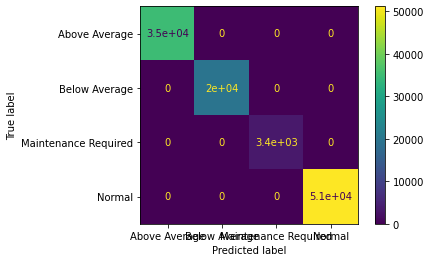

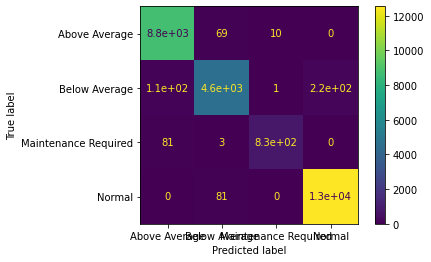

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_train, y_train)
plot_confusion_matrix(knn, X_test, y_test)

In [74]:
df_train, df_Va = train_test_split(df, test_size=0.33)

X_train = df_train.iloc[:, :-1]
y_train = df_train['Performance']

X_Va = df_Va.iloc[:, :-1] 
Y_Va = df_Va['Performance']

#Make last column into feature into the output i.e. Label (y)



In [58]:
best_accuracy = 0.
best_k = 0
best_degree = 0
for k in range(1, 15):
  print("Calculating K:",k)
  for degree in range(1, 5):
    knn_df_temp = KNeighborsClassifier(n_neighbors=k, p=degree)
    knn_df_temp.fit(X_train, y_train)

    yhat_df_va_temp = knn_df_temp.predict(X_Va)
    
    accuracy_temp = accuracy_score(Y_Va,yhat_df_va_temp )
    if accuracy_temp > best_accuracy:
      best_accuracy = accuracy_temp
      best_k = k
      best_degree = degree

print("best k:", best_k)
print("best distance metric: L" + str(best_degree))
print("best accuracy:", best_accuracy)

Calculating K: 1
Calculating K: 2
Calculating K: 3
Calculating K: 4
Calculating K: 5
Calculating K: 6
Calculating K: 7
Calculating K: 8
Calculating K: 9
Calculating K: 10
Calculating K: 11
Calculating K: 12
Calculating K: 13
Calculating K: 14
best k: 1
best distance metric: L2
best accuracy: 0.9975132110662107


### KFold Cross Validation

In [71]:
from sklearn.model_selection import KFold

In [72]:
n_folds = 5
kf = KFold(n_splits=n_folds)

best_accuracy = 0.
best_k = 0
best_degree = 0
for k in range(4, 8):
  for degree in range(1, 5):
    accuracy_sum_temp = 0.
    for training_indices, validation_indices in kf.split(X_train):
      knn_pid_fold = KNeighborsClassifier(n_neighbors=k, p=degree)
      knn_pid_fold.fit(X_train.iloc[training_indices, :], \
                      y_train.iloc[training_indices])

      yhat_pid_va_fold = \
        knn_pid_fold.predict(X_train.iloc[validation_indices, :])
      
      accuracy_fold = accuracy_score(y_train.iloc[validation_indices], \
                                     yhat_pid_va_fold)
      accuracy_sum_temp += accuracy_fold
    accuracy_temp = accuracy_sum_temp / n_folds
    if accuracy_temp > best_accuracy:
      best_accuracy = accuracy_temp
      best_k = k
      best_degree = degree

print("best k:", best_k)
print("best distance metric: L" + str(best_degree))
print("best accuracy:", best_accuracy)

best k: 4
best distance metric: L1
best accuracy: 0.9809244672406423


### The final test

In [75]:
knn_pid_2 = KNeighborsClassifier(n_neighbors=best_k, p=best_degree)
knn_pid_2.fit(X_train, y_train)

yhat_pid_test_2 = knn_pid_2.predict(X_Va)
print("Accuracy on test data:", accuracy_score(Y_Va, yhat_pid_test_2))

Accuracy on test data: 0.9853901150139882


### GridSearch

In [1]:
from sklearn.model_selection import GridSearchCV

In [77]:
knn_pid_search = GridSearchCV(estimator=KNeighborsClassifier(), \
                              cv=5, \
                              param_grid=dict(n_neighbors=[ 4, 5, 6, 7], \
                                              p=[1, 2, 3, 4]), \
                              scoring='accuracy')

In [78]:
knn_pid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [4, 5, 6, 7], 'p': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [79]:
knn_pid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='uniform')

In [ ]:
knn_pid_2 = KNeighborsClassifier(n_neighbors=3, p=4)
knn_pid_2.fit(X_train, y_train)

yhat_pid_test_2 = knn_pid_2.predict(X_test)
print("Accuracy on test data:", accuracy_score(y_test, yhat_pid_test_2))

## Decision boundaries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [ ]:
df_db = df
df_db['PerfCode'] = df_db['Performance'].map({'Normal': '0','Above Average':'1',\
                                        'Below Average':'2',\
                                        'Maintenance Required':'3'})
df_db['PerfCode']=df_db['PerfCode'].astype(int)

df_db = df_db.drop(columns = 'Performance',axis = 1)
df_db.info()
dfdb_train, dfdb_test = train_test_split(df_db, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DATE_NUM       136476 non-null  float64
 1   New_Time       136476 non-null  float64
 2   DC_POWER       136476 non-null  float64
 3   IRRADIATION    136476 non-null  float64
 4   SourceKeyCode  136476 non-null  float64
 5   PerfCode       136476 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 6.2 MB


In [ ]:
fig = px.histogram(dfdb_train, x='PerfCode', marginal="box")
fig.show()

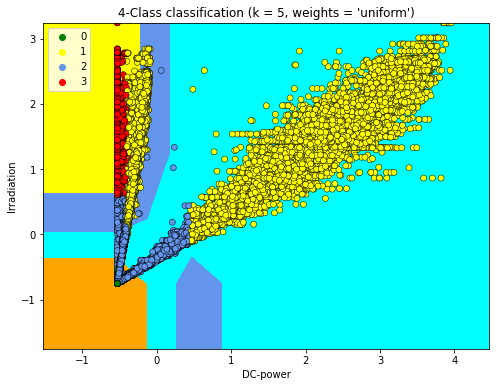

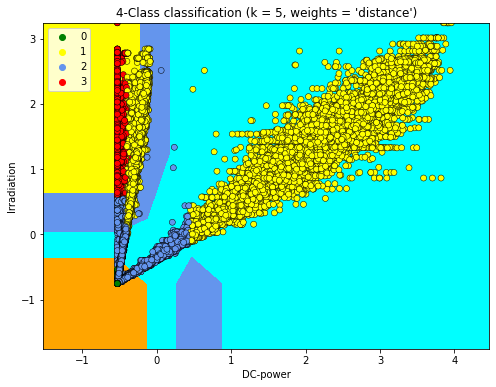

In [ ]:
n_neighbors = 5

# import some data to play with


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
#dcpower & irrigation
X = dfdb_train.iloc[:, [2,3]].values 
X
y = dfdb_train['PerfCode'].values

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan','cornflowerblue','yellow'])
cmap_bold = ['green', 'yellow','cornflowerblue','red']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('DC-power')
    plt.ylabel('Irradiation')

plt.show()

## Learning curves

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
data_sizes, training_scores, validation_scores = \
  learning_curve(KNeighborsClassifier(), X_train, \
                 y_train, cv=10, scoring='accuracy', \
                 train_sizes=np.linspace(0.01, 1.0, 51))

In [ ]:
display(training_scores.shape)

(51, 10)

In [ ]:
display(validation_scores.shape)

(51, 10)

In [ ]:
training_mean = training_scores.mean(axis=1) 
training_standard_deviation = training_scores.std(axis=1) 
validation_mean = validation_scores.mean(axis=1) 
validation_standard_deviation = validation_scores.std(axis=1)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

## baseline comparison